In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Load dataset
df = pd.read_csv("digital_wallet_ltv_dataset.csv")

In [5]:
# Keep Customer_ID separately for reference
customer_ids = df["Customer_ID"]

# Drop Customer_ID for processing
df.drop(columns=["Customer_ID"], inplace=True)

In [6]:
### 1️⃣ Data Cleaning & Preprocessing

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                            0
Location                       0
Income_Level                   0
Total_Transactions             0
Avg_Transaction_Value          0
Max_Transaction_Value          0
Min_Transaction_Value          0
Total_Spent                    0
Active_Days                    0
Last_Transaction_Days_Ago      0
Loyalty_Points_Earned          0
Referral_Count                 0
Cashback_Received              0
App_Usage_Frequency            0
Preferred_Payment_Method       0
Support_Tickets_Raised         0
Issue_Resolution_Time          0
Customer_Satisfaction_Score    0
LTV                            0
dtype: int64


In [7]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future reference

In [8]:
df.head()

,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,54,2,1,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,1,1,3,61.568590,1,3.279546e+05
1,67,1,0,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,1,2,17,60.392889,8,1.437053e+06
2,44,2,0,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,1,1,11,45.305579,4,2.419387e+05
3,30,0,0,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,2,3,6,22.030191,1,1.284599e+05
4,58,2,2,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,0,2,18,20.634723,5,9.569514e+05


In [9]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["LTV"]))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled["LTV"] = df["LTV"]  # Add target variable back

In [11]:
df_scaled.head()

,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,0.732603,1.213273,-0.016235,-1.080224,1.174568,1.366577,1.613093,-0.407417,-0.399018,0.239417,-0.267905,0.011196,-0.189173,0.003673,-0.456461,-1.162497,1.228206,-1.566088,3.279546e+05
1,1.570506,-0.009784,-1.238221,1.669055,0.794037,0.827046,-0.361739,2.102291,0.447834,0.534498,0.316924,-0.332227,1.062303,0.003673,0.443349,1.156675,1.170539,0.881471,1.437053e+06
2,0.088063,1.213273,-1.238221,-0.601632,-0.499174,0.107370,-0.108386,-0.610187,-1.036536,-1.550101,0.462094,-1.705918,-0.732716,0.003673,-0.456461,0.162744,0.430528,-0.517134,2.419387e+05
3,-0.814294,-1.232842,-1.238221,-1.502921,1.121024,-0.560671,0.627728,-0.873703,1.113897,0.962840,1.558476,0.698041,1.297652,1.227857,1.343159,-0.665531,-0.711098,-1.566088,1.284599e+05
4,0.990419,1.213273,1.205751,1.316225,0.147611,-0.575687,0.706050,1.020564,0.514440,1.381663,-0.352242,-0.469596,1.155809,-1.220512,0.443349,1.322331,-0.779543,-0.167483,9.569514e+05


In [12]:
### 2️⃣ Exploratory Data Analysis (EDA)

# Top 10 Customers by LTV
top_customers = df.nlargest(10, "LTV")
print("Top 10 Customers with Highest LTV:\n", top_customers[["Total_Spent", "Total_Transactions", "LTV"]])

Top 10 Customers with Highest LTV:
        Total_Spent  Total_Transactions           LTV
4961  1.946773e+07                 978  1.956988e+06
6110  1.937568e+07                 988  1.944566e+06
2495  1.929872e+07                 995  1.944212e+06
6358  1.921630e+07                 964  1.933341e+06
2003  1.907147e+07                 998  1.916473e+06
1980  1.896521e+07                 967  1.915722e+06
3348  1.898514e+07                 960  1.915475e+06
6101  1.901221e+07                 953  1.905627e+06
5954  1.897012e+07                 951  1.904949e+06
4847  1.898748e+07                 993  1.903035e+06


In [13]:
# Get min and max values from the dataset
min_ltv = df["LTV"].min()
max_ltv = df["LTV"].max()

# Define bins ensuring they are increasing
bins = [min_ltv, min_ltv + (max_ltv - min_ltv) * 0.25, 
        min_ltv + (max_ltv - min_ltv) * 0.5, 
        min_ltv + (max_ltv - min_ltv) * 0.75, 
        max_ltv + 1]  # Ensure last bin includes the max value

labels = ["Low LTV", "Medium LTV", "High LTV", "Very High LTV"]

# Apply binning
df["LTV_Category"] = pd.cut(df["LTV"], bins=bins, labels=labels, include_lowest=True)

# Check category distribution
print(df["LTV_Category"].value_counts())

LTV_Category
Low LTV          4062
Medium LTV       1801
High LTV          864
Very High LTV     273
Name: count, dtype: int64


C:\Users\fatim\AppData\Local\Temp\ipykernel_20896\790670997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ltv_distribution.index, y=ltv_distribution.values, palette="Blues_r")


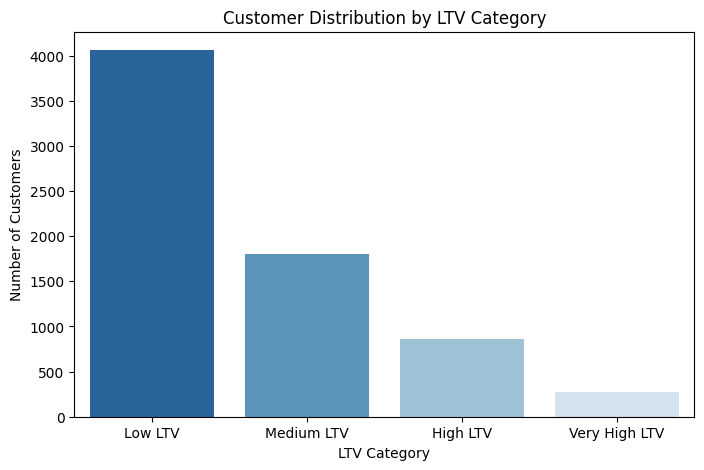

In [14]:
ltv_distribution = df["LTV_Category"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=ltv_distribution.index, y=ltv_distribution.values, palette="Blues_r")
plt.title("Customer Distribution by LTV Category")
plt.xlabel("LTV Category")
plt.ylabel("Number of Customers")
plt.show()

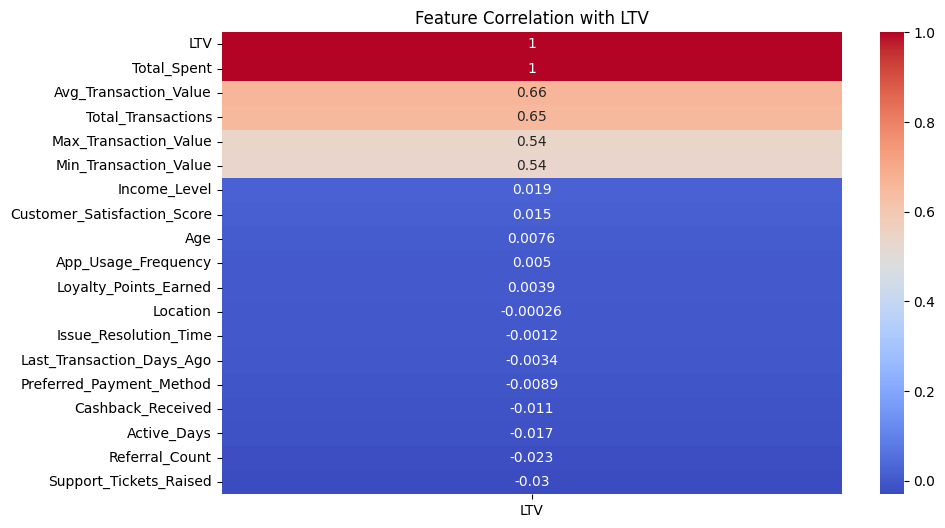

In [15]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[["LTV"]].sort_values(by="LTV", ascending=False), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with LTV")
plt.show()

C:\Users\fatim\AppData\Local\Temp\ipykernel_20896\1492978403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Customer_Satisfaction_Score"], y=df["LTV"], palette="coolwarm")


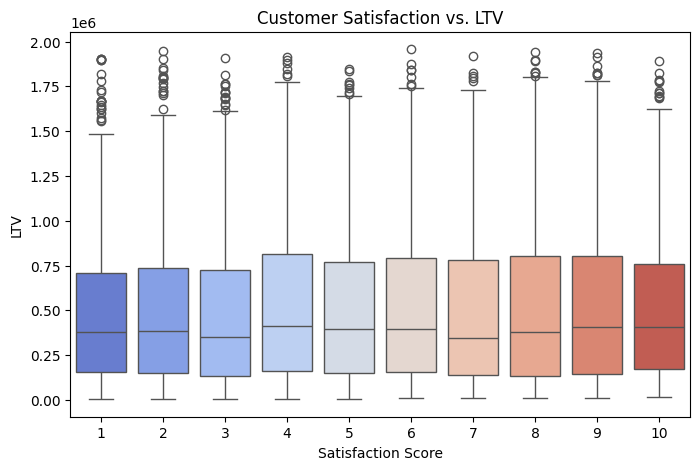

In [16]:
###  Customer Satisfaction vs. LTV
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Customer_Satisfaction_Score"], y=df["LTV"], palette="coolwarm")
plt.title("Customer Satisfaction vs. LTV")
plt.xlabel("Satisfaction Score")
plt.ylabel("LTV")
plt.show()

# Boxplot: Customer Satisfaction vs. LTV
# --------------------------------------
# This boxplot shows the distribution of LTV across different customer satisfaction scores (1-10).
# - The box represents the interquartile range (middle 50% of data).
# - The median (50th percentile) is marked inside each box.
# - Whiskers extend to the min and max values (excluding outliers).
# - Outliers (dots) indicate customers with unusually high LTV.
# 
# Key Insights:
# - LTV is spread across all satisfaction scores, meaning satisfaction alone isn't a strong predictor.
# - High LTV customers exist even at low satisfaction scores.
# - Median LTV remains similar across different scores, suggesting other factors influence LTV more.

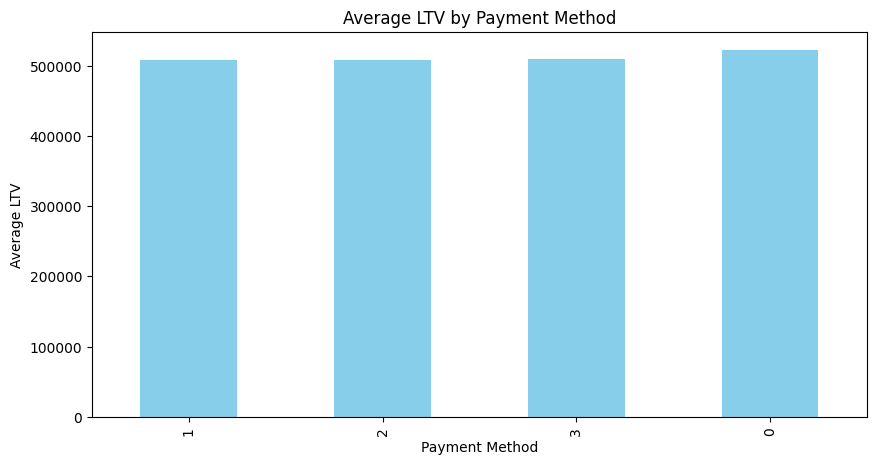

In [17]:
### Payment Method and LTV
plt.figure(figsize=(10,5))
df.groupby("Preferred_Payment_Method")["LTV"].mean().sort_values().plot(kind="bar", color="skyblue")
plt.title("Average LTV by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Average LTV")
plt.show()

The chart shows that LTV is nearly the same across all payment methods, meaning payment method does not significantly impact LTV.

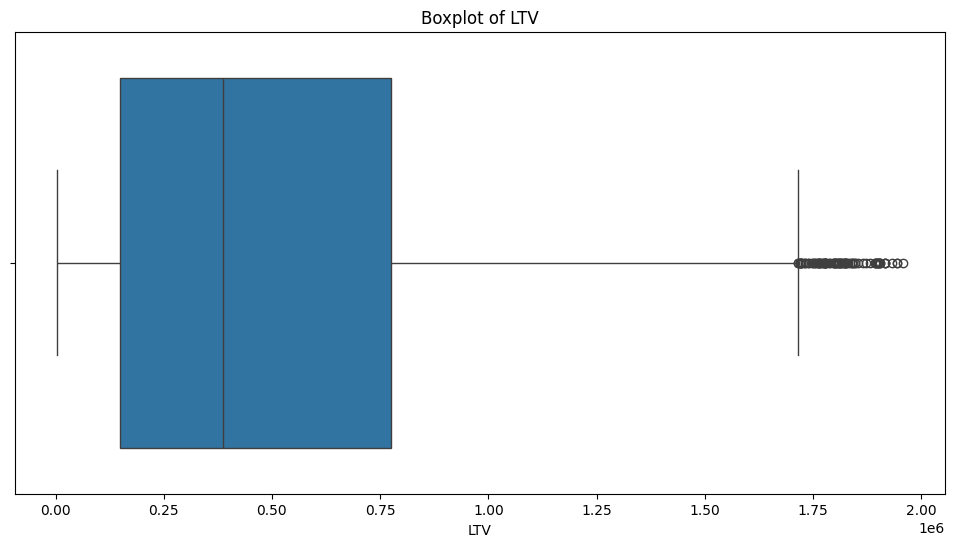

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="LTV")
plt.title("Boxplot of LTV")
plt.show()

In [24]:

df["LTV"] = np.log1p(df["LTV"])  # Apply log transformation

In [25]:
###  LTV Prediction Model

# Define Features & Target
X = df_scaled.drop(columns=["LTV"])
y = df_scaled["LTV"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [19]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:\nMAE: {mae:.2f}\nR² Score: {r2:.2f}")

# Attach Predictions Back to Customer IDs
df_predictions = pd.DataFrame({"Customer_ID": customer_ids.iloc[X_test.index], "Predicted_LTV": y_pred})
print("\nSample Predictions:\n", df_predictions.head())


Model Performance:
MAE: 2559.59
R² Score: 1.00

Sample Predictions:
      Customer_ID  Predicted_LTV
6500   cust_6500  452382.102140
2944   cust_2944  274701.866065
2024   cust_2024   91718.056851
263    cust_0263   58577.885450
4350   cust_4350   60896.416096


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2559.5948461198795
Mean Squared Error (MSE): 10992422.959404513
Root Mean Squared Error (RMSE): 3315.4823117315095
R² Score: 0.9999435437228814


In [21]:
# Convert to DataFrame for easy comparison
comparison_df = pd.DataFrame({
    "Customer_ID": X_test.index,  # Assuming Customer_ID is the index
    "Actual_LTV": y_test,
    "Predicted_LTV": y_pred
})

# Show a few samples
print(comparison_df.sample(10))

      Customer_ID     Actual_LTV  Predicted_LTV
2794         2794   54419.332607   52897.477597
2704         2704  395263.923911  400466.778524
5312         5312   50543.147308   48019.685904
465           465  517006.625953  520842.169984
1144         1144   48962.001444   48702.602703
1465         1465  376300.315772  380096.024883
2458         2458   28747.040206   28444.722259
6951         6951  455734.233142  456637.895133
3915         3915  246732.507322  242425.230991
4060         4060  273243.304373  273030.703970


In [ ]:
%pip install xgboost lightgbm

In [28]:

df = df.drop(columns=['low LTV',"LTV_Category"], errors='ignore')  # Remove the "low LTV" column

In [29]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Splitting the dataset
X = df.drop('LTV',axis=1)
y = df['LTV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trying different models
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse}")

RandomForest MSE: 0.0017450749939831353
XGBoost MSE: 0.0013324542636506684
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2674
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 18
[LightGBM] [Info] Start training from score 12.643410
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [ ]:
print(df.dtypes)

Age                               int64
Location                          int64
Income_Level                      int64
Total_Transactions                int64
Avg_Transaction_Value           float64
Max_Transaction_Value           float64
Min_Transaction_Value           float64
Total_Spent                     float64
Active_Days                       int64
Last_Transaction_Days_Ago         int64
Loyalty_Points_Earned             int64
Referral_Count                    int64
Cashback_Received               float64
App_Usage_Frequency               int64
Preferred_Payment_Method          int64
Support_Tickets_Raised            int64
Issue_Resolution_Time           float64
Customer_Satisfaction_Score       int64
LTV                             float64
LTV_Category                   category
dtype: object


   Actual LTV  Predicted LTV
0   12.085372      12.091001
1   12.203755      12.195411
2   13.550689      13.550902
3   10.845517      10.837595
4   10.450788      10.454010
5   13.266438      13.256581
6   13.099541      13.102862
7   12.801492      12.797458
8   12.177902      12.166198
9   12.342095      12.356060


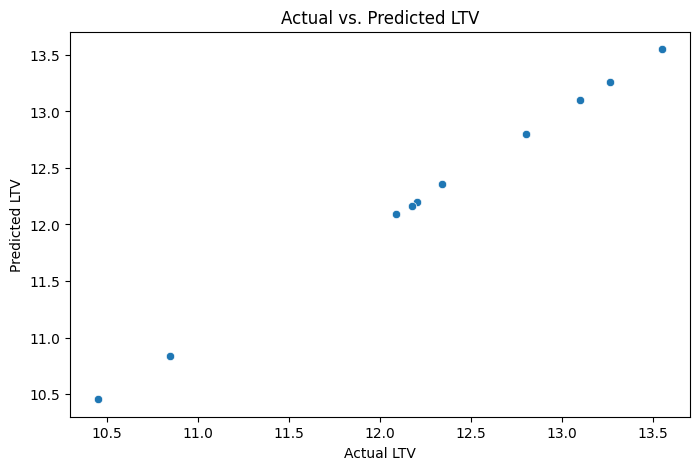

In [34]:
# Reset index to avoid out-of-bounds errors
y_test_reset = y_test.reset_index(drop=True)
y_pred_reset = pd.Series(y_pred, index=y_test_reset.index)  # Ensure alignment

# Ensure sample size does not exceed available data
sample_size = min(10, len(y_test_reset))

# Select random indices safely
sample_indices = np.random.choice(y_test_reset.index, size=sample_size, replace=False)

# Create a DataFrame to compare actual vs. predicted LTV values
actual_vs_pred = pd.DataFrame({
    "Actual LTV": y_test_reset.loc[sample_indices].values,
    "Predicted LTV": y_pred_reset.loc[sample_indices].values
})

# Display the comparison
print(actual_vs_pred)

# Optional: Plot actual vs. predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=actual_vs_pred["Actual LTV"], y=actual_vs_pred["Predicted LTV"])
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Actual vs. Predicted LTV")
plt.show()

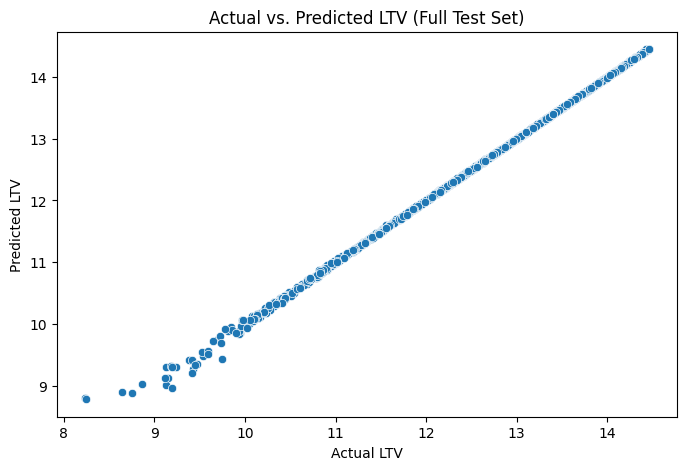

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Actual vs. Predicted LTV (Full Test Set)")
plt.show()